In [1]:
from analysis import *
from docking_analysis import *
from IPython.display import Markdown

task_name = 'Keck_Pria_AS_Retest'

file_paths = {0: 'single_classification_22/45540945/',
              1: 'single_classification_42/45539118/', 
              2: 'single_regression_2/45540957/',
              3: 'single_regression_11/45540958/',
              4: 'vanilla_lstm_8_updated_SMILES/46484281/',
              5: 'vanilla_lstm_19/46495805/',
              6: 'tree_net/classification/',
              7: 'tree_net/regression/',
              8: 'multi_classification_15/eval_keck/',
              9: 'multi_classification_18/eval_keck/',
              10: 'random_forest_97/'}

file_paths = {0: 'single_classification_22/45540945/',
              1: 'single_regression_2/45540957/',
              2: 'vanilla_lstm_19/46495805/',
              3: 'multi_classification_15/eval_keck/',
              4: 'random_forest_97/',
              5: 'irv_80/'}

number = 20

evaluations = {0: 'train prec', 1: 'train roc', 2: 'train bedroc',
               3: 'val prec', 4: 'val roc', 5: 'val bedroc',
               6: 'test prec', 7: 'test roc', 8: 'test bedroc',
               9: 'EF_2', 10: 'EF_1', 11: 'EF_015', 12: 'EF_01',
               13: 'NEF_2', 14: 'NEF_1', 15: 'NEF_015', 16:'NEF_01'}

paths = ['../../output/stage_1/cross_validation_{}/{}'.format(task_name, p) for p in file_paths.values()]
model_list = ['single_classification',
              'single_regression',
              'vanilla_lstm',
              'multi_classification',
              'random_forest',
              'irv']

/home/sliu/anaconda/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: During startup - 
  warnings.warn(x, RRuntimeWarning)
/home/sliu/anaconda/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Warning messages:

  warnings.warn(x, RRuntimeWarning)
/home/sliu/anaconda/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 1: package ‘methods’ was built under R version 3.3.3 

  warnings.warn(x, RRuntimeWarning)
/home/sliu/anaconda/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 2: package ‘datasets’ was built under R version 3.3.3 

  warnings.warn(x, RRuntimeWarning)
/home/sliu/anaconda/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 3: package ‘utils’ was built under R version 3.3.3 

  warnings.warn(x, RRuntimeWarning)
/home/sliu/anaconda/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 4: package ‘grDevices’ was buil

In [2]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
for k in range(len(paths)):
    print 'Check ', file_paths[k]
    check_result_completeness(file_path=paths[k], number=number)
    print

Check  single_classification_22/45540945/
All output result complete.

Check  single_regression_2/45540957/
All output result complete.

Check  vanilla_lstm_19/46495805/
All output result complete.

Check  multi_classification_15/eval_keck/
All output result complete.

Check  random_forest_97/
All output result complete.

Check  irv_80/
All output result complete.



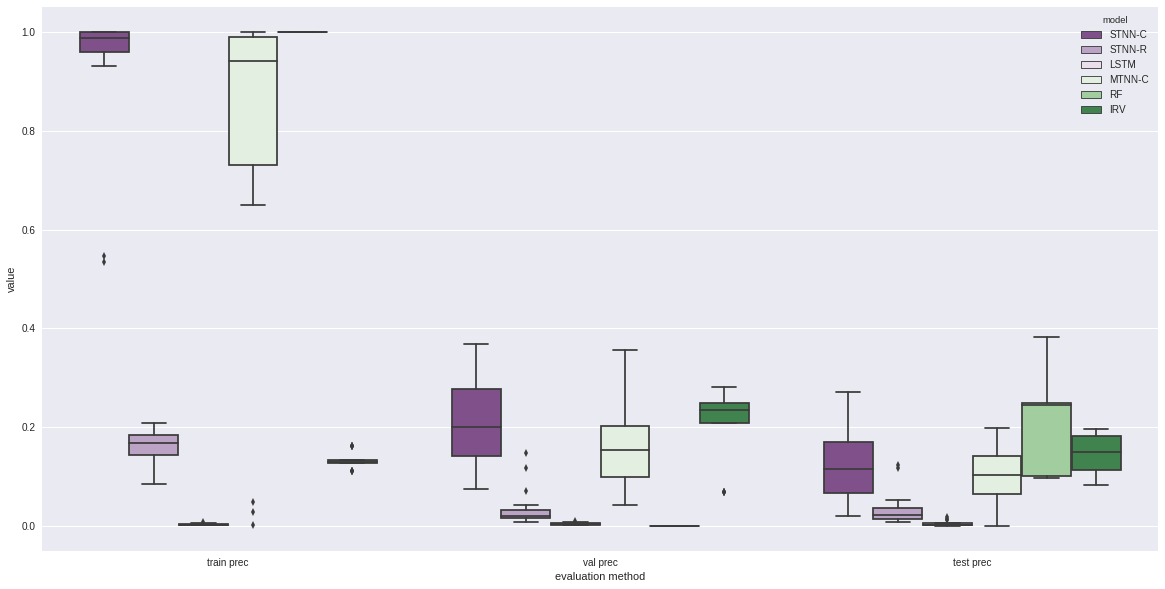

In [5]:
plot_cross_validation(paths,
                      evaluation_list=[evaluations[0], evaluations[3], evaluations[6]],
                      model_list=model_list,
                      title='AUC[PR]',
                      task_name=task_name)

In [6]:
mean_content, median_content, std_content = table_cross_validation(paths,
                                                                   evaluation_list=[evaluations[0], evaluations[3], evaluations[6]],
                                                                   model_list=model_list,
                                                                   evaluation_mode='AUC[PR]')
content = '{}\n{}\n{}'.format(mean_content, median_content, std_content)
Markdown(content)

## Model comparison
### mean of AUC[PR]
| model | train prec | val prec | test prec |
| --- | --- | --- | --- |
| STNN-C | 0.937 | 0.218 | 0.124 |
| STNN-R | 0.160 | 0.035 | 0.034 |
| LSTM | 0.003 | 0.004 | 0.005 |
| MTNN-C | 0.777 | 0.161 | 0.101 |
| RF | 1.000 | 0.000 | 0.215 |
| IRV | 0.133 | 0.209 | 0.145 |

## Model comparison
### median of AUC[PR]
| model | train prec | val prec | test prec |
| --- | --- | --- | --- |
| STNN-C | 0.988 | 0.200 | 0.116 |
| STNN-R | 0.167 | 0.021 | 0.022 |
| LSTM | 0.003 | 0.004 | 0.003 |
| MTNN-C | 0.942 | 0.155 | 0.103 |
| RF | 1.000 | 0.000 | 0.244 |
| IRV | 0.130 | 0.234 | 0.149 |

## Model comparison
### std of AUC[PR]
| model | train prec | val prec | test prec |
| --- | --- | --- | --- |
| STNN-C | 0.138 | 0.087 | 0.073 |
| STNN-R | 0.034 | 0.037 | 0.032 |
| LSTM | 0.002 | 0.002 | 0.005 |
| MTNN-C | 0.342 | 0.081 | 0.058 |
| RF | 0.000 | 0.000 | 0.110 |
| IRV | 0.017 | 0.076 | 0.043 |


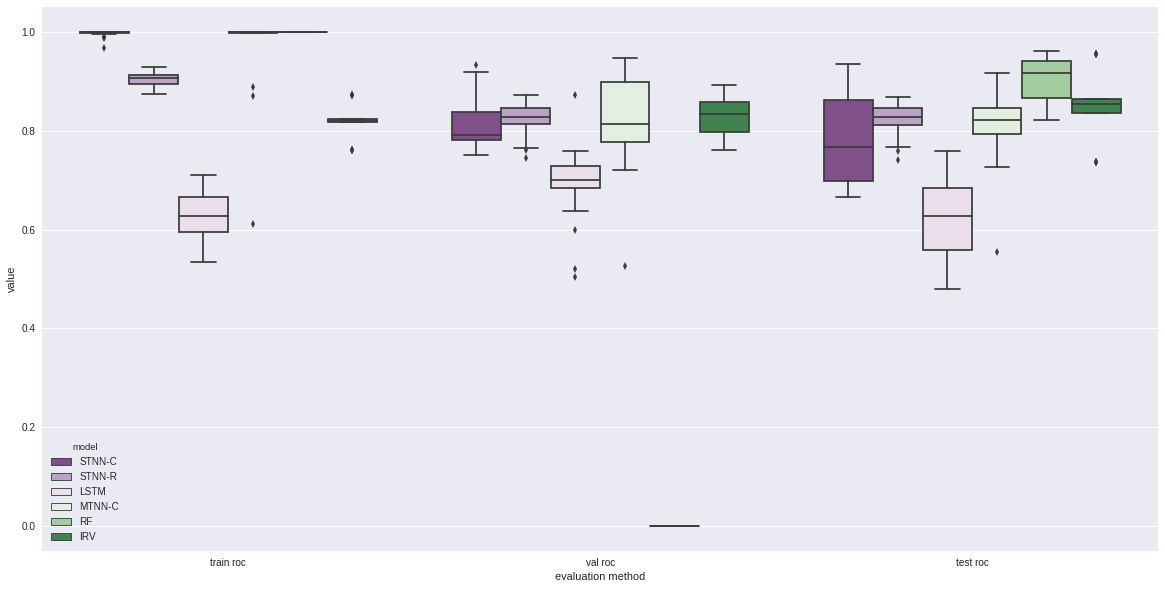

In [7]:
plot_cross_validation(paths,
                      evaluation_list=[evaluations[1], evaluations[4], evaluations[7]],
                      model_list=model_list,
                      title='AUC[ROC]',
                      task_name=task_name)

In [8]:
mean_content, median_content, std_content = table_cross_validation(paths,
                                                                   evaluation_list=[evaluations[1], evaluations[4], evaluations[7]],
                                                                   model_list=model_list,
                                                                   evaluation_mode='AUC[ROC]')
content = '{}\n{}\n{}'.format(mean_content, median_content, std_content)
Markdown(content)

## Model comparison
### mean of AUC[ROC]
| model | train roc | val roc | test roc |
| --- | --- | --- | --- |
| STNN-C | 0.996 | 0.811 | 0.784 |
| STNN-R | 0.904 | 0.822 | 0.823 |
| LSTM | 0.626 | 0.692 | 0.624 |
| MTNN-C | 0.968 | 0.825 | 0.812 |
| RF | 1.000 | 0.000 | 0.901 |
| IRV | 0.819 | 0.829 | 0.849 |

## Model comparison
### median of AUC[ROC]
| model | train roc | val roc | test roc |
| --- | --- | --- | --- |
| STNN-C | 1.000 | 0.791 | 0.767 |
| STNN-R | 0.907 | 0.828 | 0.828 |
| LSTM | 0.628 | 0.700 | 0.627 |
| MTNN-C | 1.000 | 0.814 | 0.821 |
| RF | 1.000 | 0.000 | 0.917 |
| IRV | 0.819 | 0.835 | 0.855 |

## Model comparison
### std of AUC[ROC]
| model | train roc | val roc | test roc |
| --- | --- | --- | --- |
| STNN-C | 0.008 | 0.049 | 0.091 |
| STNN-R | 0.014 | 0.033 | 0.034 |
| LSTM | 0.047 | 0.081 | 0.078 |
| MTNN-C | 0.092 | 0.100 | 0.078 |
| RF | 0.000 | 0.000 | 0.052 |
| IRV | 0.037 | 0.047 | 0.072 |


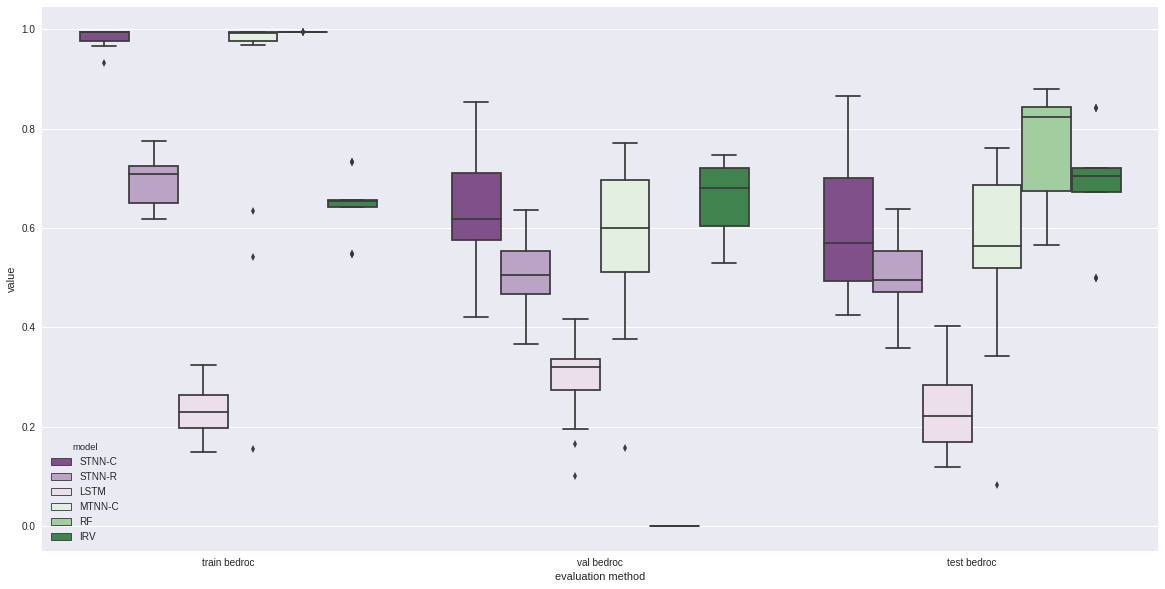

In [9]:
plot_cross_validation(paths,
                      evaluation_list=[evaluations[2], evaluations[5], evaluations[8]],
                      model_list=model_list,
                      title='AUC[BED ROC]',
                      task_name=task_name)

In [10]:
mean_content, median_content, std_content = table_cross_validation(paths,
                                                                   evaluation_list=[evaluations[2], evaluations[5], evaluations[8]],
                                                                   model_list=model_list,
                                                                   evaluation_mode='AUC[BED ROC]')
content = '{}\n{}\n{}'.format(mean_content, median_content, std_content)
Markdown(content)

## Model comparison
### mean of AUC[BED ROC]
| model | train bedroc | val bedroc | test bedroc |
| --- | --- | --- | --- |
| STNN-C | 0.986 | 0.632 | 0.598 |
| STNN-R | 0.699 | 0.508 | 0.507 |
| LSTM | 0.233 | 0.298 | 0.235 |
| MTNN-C | 0.908 | 0.579 | 0.556 |
| RF | 0.995 | 0.000 | 0.757 |
| IRV | 0.647 | 0.656 | 0.688 |

## Model comparison
### median of AUC[BED ROC]
| model | train bedroc | val bedroc | test bedroc |
| --- | --- | --- | --- |
| STNN-C | 0.995 | 0.619 | 0.570 |
| STNN-R | 0.709 | 0.505 | 0.495 |
| LSTM | 0.230 | 0.320 | 0.221 |
| MTNN-C | 0.993 | 0.600 | 0.563 |
| RF | 0.995 | 0.000 | 0.824 |
| IRV | 0.654 | 0.680 | 0.704 |

## Model comparison
### std of AUC[BED ROC]
| model | train bedroc | val bedroc | test bedroc |
| --- | --- | --- | --- |
| STNN-C | 0.016 | 0.110 | 0.132 |
| STNN-R | 0.045 | 0.070 | 0.070 |
| LSTM | 0.049 | 0.075 | 0.088 |
| MTNN-C | 0.217 | 0.149 | 0.159 |
| RF | 0.000 | 0.000 | 0.121 |
| IRV | 0.060 | 0.081 | 0.113 |


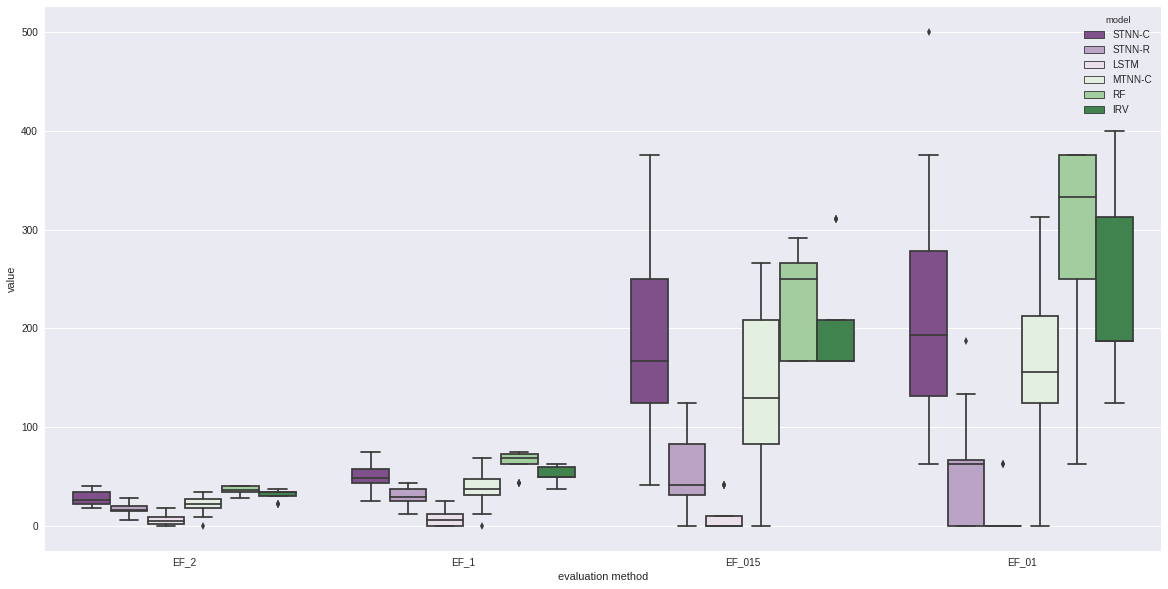

In [11]:
plot_cross_validation(paths,
                      evaluation_list=[evaluations[9], evaluations[10], evaluations[11], evaluations[12]],
                      model_list=model_list,
                      title='Enrichment Factor on Test Set',
                      task_name=task_name)

In [12]:
mean_content, median_content, std_content = table_cross_validation(paths,
                                                                   evaluation_list=[evaluations[9], evaluations[10], evaluations[11], evaluations[12]],
                                                                   model_list=model_list,
                                                                   evaluation_mode='Enrichment Factor (Test-set)')
content = '{}\n{}\n{}'.format(mean_content, median_content, std_content)
Markdown(content)

## Model comparison
### mean of Enrichment Factor (Test-set)
| model | EF_2 | EF_1 | EF_015 | EF_01 |
| --- | --- | --- | --- | --- |
| STNN-C | 27.531 | 50.062 | 177.222 | 211.875 |
| STNN-R | 17.688 | 29.042 | 50.833 | 57.083 |
| LSTM | 5.979 | 7.521 | 10.417 | 9.375 |
| MTNN-C | 22.771 | 38.958 | 137.361 | 158.542 |
| RF | 36.083 | 64.667 | 228.333 | 279.167 |
| IRV | 31.625 | 52.000 | 203.889 | 242.500 |

## Model comparison
### median of Enrichment Factor (Test-set)
| model | EF_2 | EF_1 | EF_015 | EF_01 |
| --- | --- | --- | --- | --- |
| STNN-C | 26.667 | 48.333 | 166.667 | 193.750 |
| STNN-R | 16.146 | 28.958 | 41.667 | 62.500 |
| LSTM | 4.792 | 6.250 | 0.000 | 0.000 |
| MTNN-C | 22.604 | 37.500 | 129.167 | 156.250 |
| RF | 36.667 | 68.750 | 250.000 | 333.333 |
| IRV | 34.375 | 50.000 | 166.667 | 187.500 |

## Model comparison
### std of Enrichment Factor (Test-set)
| model | EF_2 | EF_1 | EF_015 | EF_01 |
| --- | --- | --- | --- | --- |
| STNN-C | 6.486 | 12.902 | 86.469 | 115.060 |
| STNN-R | 6.070 | 9.024 | 40.113 | 53.923 |
| LSTM | 5.627 | 8.743 | 18.511 | 22.897 |
| MTNN-C | 8.915 | 15.879 | 82.940 | 89.493 |
| RF | 4.765 | 11.615 | 53.421 | 120.610 |
| IRV | 5.570 | 9.090 | 57.442 | 102.148 |


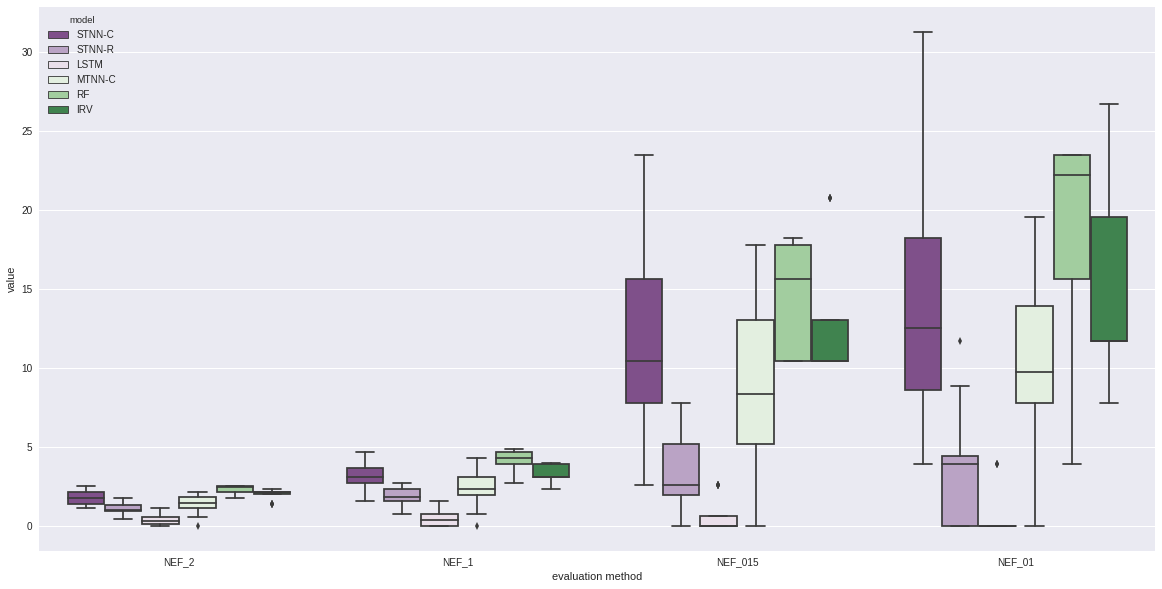

In [13]:
plot_cross_validation(paths,
                      evaluation_list=[evaluations[13], evaluations[14], evaluations[15], evaluations[16]],
                      model_list=model_list,
                      title='Normalized Enrichment Factor on Test Set',
                      task_name=task_name)

In [14]:
mean_content, median_content, std_content = table_cross_validation(paths,
                                                                   evaluation_list=[evaluations[13], evaluations[14], evaluations[15], evaluations[16]],
                                                                   model_list=model_list,
                                                                   evaluation_mode='Normalized Enrichment Factor (Test-set)')
content = '{}\n{}\n{}'.format(mean_content, median_content, std_content)
Markdown(content)

## Model comparison
### mean of Normalized Enrichment Factor (Test-set)
| model | NEF_2 | NEF_1 | NEF_015 | NEF_01 |
| --- | --- | --- | --- | --- |
| STNN-C | 1.744 | 3.175 | 11.225 | 13.409 |
| STNN-R | 1.118 | 1.835 | 3.233 | 3.623 |
| LSTM | 0.376 | 0.471 | 0.651 | 0.586 |
| MTNN-C | 1.441 | 2.470 | 8.715 | 10.062 |
| RF | 2.286 | 4.103 | 14.493 | 17.726 |
| IRV | 2.002 | 3.300 | 13.002 | 15.490 |

## Model comparison
### median of Normalized Enrichment Factor (Test-set)
| model | NEF_2 | NEF_1 | NEF_015 | NEF_01 |
| --- | --- | --- | --- | --- |
| STNN-C | 1.758 | 3.118 | 10.417 | 12.526 |
| STNN-R | 1.044 | 1.865 | 2.604 | 3.906 |
| LSTM | 0.306 | 0.391 | 0.000 | 0.000 |
| MTNN-C | 1.461 | 2.344 | 8.351 | 9.766 |
| RF | 2.444 | 4.297 | 15.625 | 22.222 |
| IRV | 2.148 | 3.125 | 10.417 | 11.719 |

## Model comparison
### std of Normalized Enrichment Factor (Test-set)
| model | NEF_2 | NEF_1 | NEF_015 | NEF_01 |
| --- | --- | --- | --- | --- |
| STNN-C | 0.410 | 0.834 | 5.445 | 7.199 |
| STNN-R | 0.378 | 0.558 | 2.544 | 3.420 |
| LSTM | 0.351 | 0.546 | 1.157 | 1.431 |
| MTNN-C | 0.559 | 1.007 | 5.332 | 5.765 |
| RF | 0.308 | 0.783 | 3.532 | 7.689 |
| IRV | 0.344 | 0.621 | 4.102 | 6.938 |


# Docking Results

In [15]:
content = get_auc_table(file_path='../../output/docking/stage_1/lc123_all_docking_scores.csv',
                        target_name='Keck_Pria_AS_Retest',
                        auc_list=['precision_auc_single', 'roc_auc_single', 'bedroc_auc_single'],
                        auc_header=['AUC[PR]', 'AUC[ROC]', 'AUC[BED ROC]'],
                        title='AUC for Docking Methods')
Markdown(content)

## AUC for Docking Methods
| docking method | AUC[PR] | AUC[ROC] | AUC[BED ROC] |
| --- | --- | --- | --- |
| consensus_bcs_efr1_opt | 0.000974 | 0.423138 | 0.049789 |
| consensus_bcs_rocauc_opt | 0.000960 | 0.404479 | 0.047588 |
| consensus_dockscore_max | 0.000853 | 0.394448 | 0.049962 |
| consensus_dockscore_mean | 0.000851 | 0.388092 | 0.051564 |
| consensus_dockscore_median | 0.000881 | 0.405352 | 0.059212 |
| dockscore_ad4 | 0.000786 | 0.353694 | 0.036518 |
| dockscore_dock6 | 0.000874 | 0.411111 | 0.052285 |
| dockscore_fred | 0.001077 | 0.478239 | 0.092387 |
| dockscore_hybrid | 0.001112 | 0.478111 | 0.103842 |
| dockscore_plants | 0.000830 | 0.374038 | 0.041266 |
| dockscore_rdockint | 0.000955 | 0.441563 | 0.070008 |
| dockscore_rdocktot | 0.000932 | 0.428523 | 0.067484 |
| dockscore_smina | 0.000845 | 0.379715 | 0.058736 |
| dockscore_surflex | 0.000978 | 0.428544 | 0.079962 |


In [16]:
EF_ratio_list = [0.02, 0.01, 0.0015, 0.001]
content = get_ef_table(file_path='../../output/docking/stage_1/lc123_all_docking_scores.csv',
                       target_name='Keck_Pria_AS_Retest',
                       efr_list=EF_ratio_list,
                       ef_header=['EF_2', 'EF_1', 'EF_015', 'EF_01'],
                       title='Enrichment Factor for Docking Methods')
Markdown(content)

## Enrichment Factor for Docking Methods
| docking method | EF_2 | EF_1 | EF_015 | EF_01 |
| --- | --- | --- | --- | --- |
| consensus_bcs_efr1_opt | 0.657894736842 | 1.31578947368 | 8.77192982456 | 0.0 |
| consensus_bcs_rocauc_opt | 0.657894736842 | 1.31578947368 | 8.77192982456 | 13.1578947368 |
| consensus_dockscore_max | 0.0 | 0.0 | 0.0 | 0.0 |
| consensus_dockscore_mean | 0.657894736842 | 1.31578947368 | 0.0 | 0.0 |
| consensus_dockscore_median | 0.657894736842 | 0.0 | 0.0 | 0.0 |
| dockscore_ad4 | 0.0 | 0.0 | 0.0 | 0.0 |
| dockscore_dock6 | 0.0 | 0.0 | 0.0 | 0.0 |
| dockscore_fred | 0.657894736842 | 0.0 | 0.0 | 0.0 |
| dockscore_hybrid | 1.31578947368 | 1.31578947368 | 0.0 | 0.0 |
| dockscore_plants | 0.657894736842 | 1.31578947368 | 0.0 | 0.0 |
| dockscore_rdockint | 0.0 | 0.0 | 0.0 | 0.0 |
| dockscore_rdocktot | 0.657894736842 | 1.31578947368 | 0.0 | 0.0 |
| dockscore_smina | 0.0 | 0.0 | 0.0 | 0.0 |
| dockscore_surflex | 0.657894736842 | 1.31578947368 | 0.0 | 0.0 |


In [17]:
EF_ratio_list = [0.02, 0.01, 0.0015, 0.001]
content = get_nef_table(file_path='../../output/docking/stage_1/lc123_all_docking_scores.csv',
                        target_name='Keck_Pria_AS_Retest',
                        nefr_list=EF_ratio_list,
                        nef_header=['NEF_2', 'NEF_1', 'NEF_015', 'NEF_01'],
                        title='Normalized Enrichment Factor for Docking Methods')
Markdown(content)

## Normalized Enrichment Factor for Docking Methods
| docking method | 0.02 | 0.01 | 0.0015 | 0.001 |
| --- | --- | --- | --- | --- |
| consensus_bcs_efr1_opt | 0.0131578947368 | 0.0131578947368 | 0.0131578947368 | 0.0 |
| consensus_bcs_rocauc_opt | 0.0131578947368 | 0.0131578947368 | 0.0131578947368 | 0.0149253731343 |
| consensus_dockscore_max | 0.0 | 0.0 | 0.0 | 0.0 |
| consensus_dockscore_mean | 0.0131578947368 | 0.0131578947368 | 0.0 | 0.0 |
| consensus_dockscore_median | 0.0131578947368 | 0.0 | 0.0 | 0.0 |
| dockscore_ad4 | 0.0 | 0.0 | 0.0 | 0.0 |
| dockscore_dock6 | 0.0 | 0.0 | 0.0 | 0.0 |
| dockscore_fred | 0.0131578947368 | 0.0 | 0.0 | 0.0 |
| dockscore_hybrid | 0.0263157894737 | 0.0131578947368 | 0.0 | 0.0 |
| dockscore_plants | 0.0131578947368 | 0.0131578947368 | 0.0 | 0.0 |
| dockscore_rdockint | 0.0 | 0.0 | 0.0 | 0.0 |
| dockscore_rdocktot | 0.0131578947368 | 0.0131578947368 | 0.0 | 0.0 |
| dockscore_smina | 0.0 | 0.0 | 0.0 | 0.0 |
| dockscore_surflex | 0.0131578947368 | 0.0131578947368 | 0.0 | 0.0 |


# Plot EF curve

In [18]:
from EF_curve_support_loader import *

%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 30.0)

Using Theano backend.


In [19]:
predictions_path = '../../output/stage_1_predictions/cross_validation_{}'.format(task_name)

model_names_list = ['single_classification_22',
                    'single_regression_2',
                    'multi_classification_15',
                    'sklearn_rf_390014_97',
                    'deepchem_irv_80']

In [20]:
EF_ratio_list = np.linspace(0.001, 0.15, 100)
N = len(model_names_list)
data_set_name = 'Keck_Pria_AS_Retest'

data_pd_list = []
for i in range(N):
    temp_pd = get_EF_curve_in_pd(EF_ratio_list=EF_ratio_list,
                                 data_set_name=data_set_name,
                                 model_name=model_names_list[i],
                                 predictions_path=predictions_path,
                                 regenerate=True)
    data_pd_list.append(temp_pd)
    
whole_pd = data_pd_list[0]
for i in range(1, N):
    whole_pd = whole_pd.append(data_pd_list[i])

running single_classification_22
running single_regression_2
running multi_classification_15
running sklearn_rf_390014_97
running deepchem_irv_80


# EF-Curve

Let $ R\% = EF_{ratio} \in [0\%, 100\%]$ is a pre-defined float number.

$EF = \frac{\text{# predicted pos in top R% samples}}{\text{# actual pos} \,\times\, R\%} $

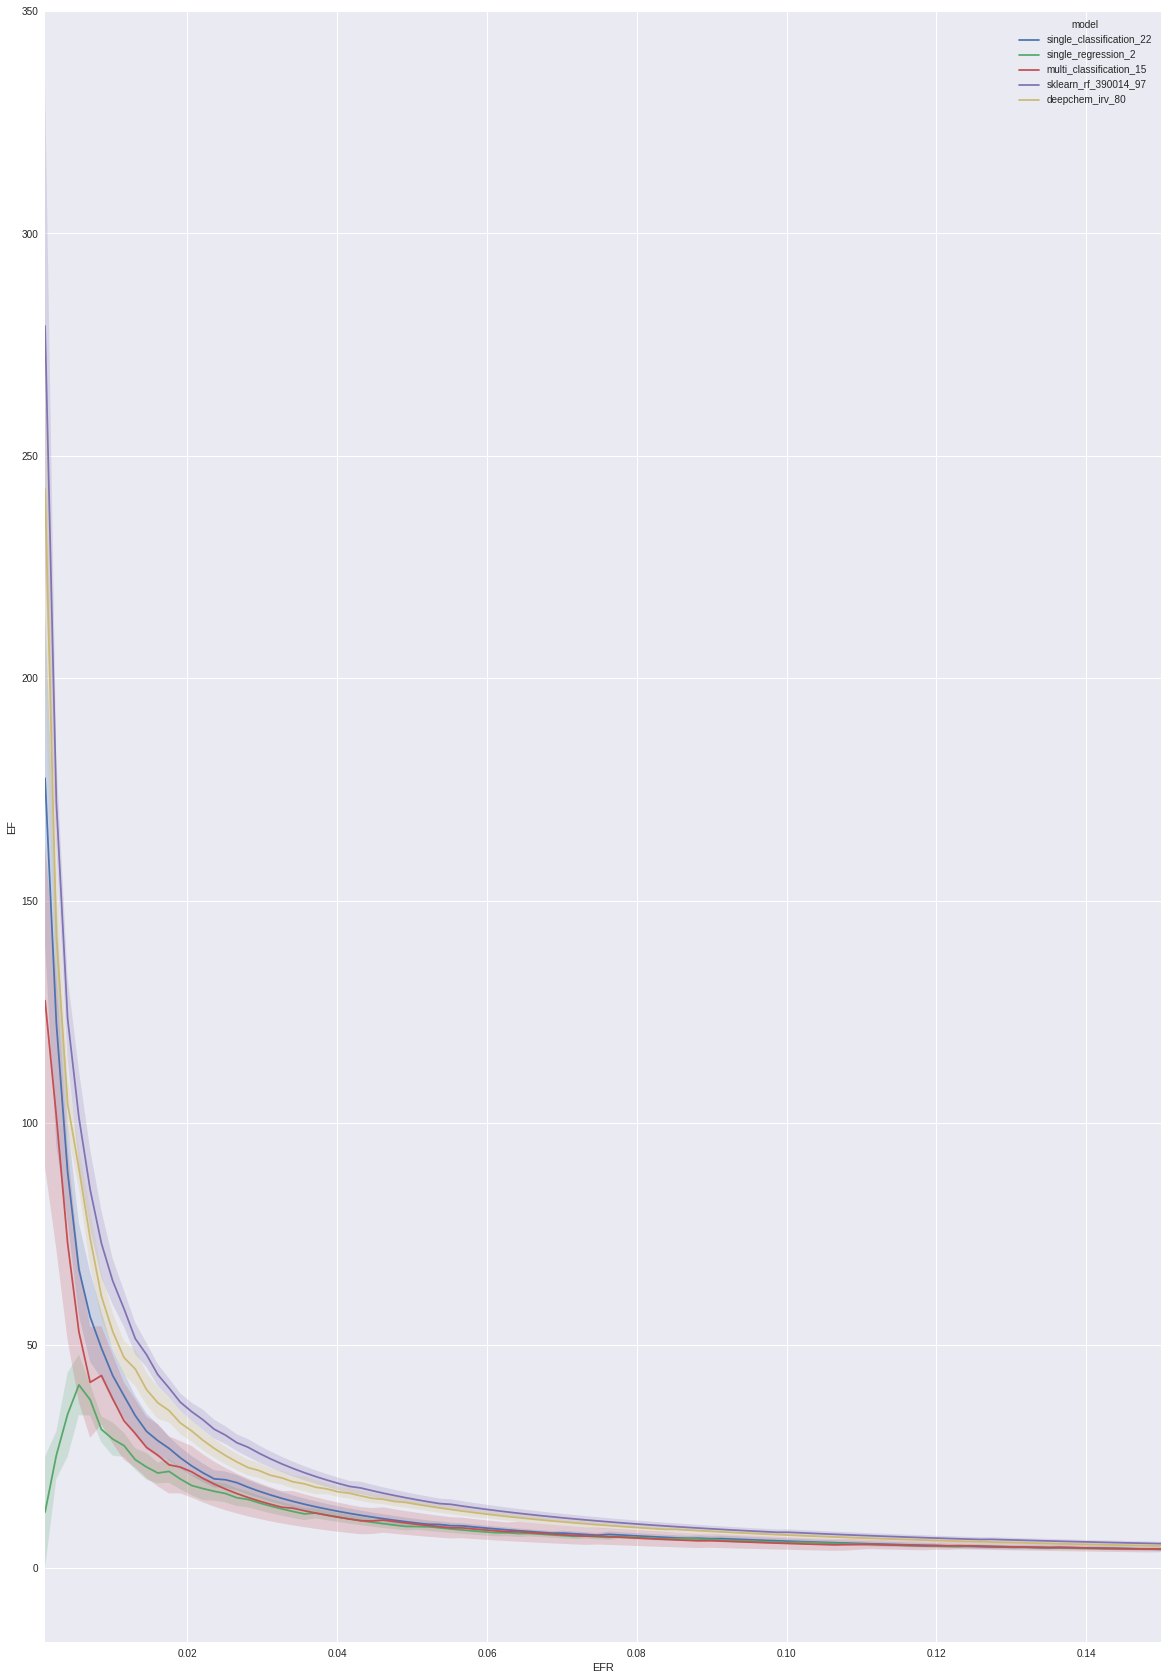

In [21]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 30.0)

sns.tsplot(data=whole_pd, time="EFR", unit="running process", condition="model", value="EF")

figure_dir = 'plottings/{}'.format(task_name)
if not os.path.isdir(figure_dir):
    os.makedirs(figure_dir)
plt.savefig('{}/EF_curve.png'.format(figure_dir), bbox_inches = 'tight')

# Normalized EF-Curve

Let $ R\% = EF_{ratio} \in [0\%, 100\%]$ is a pre-defined float number.

$EF = \frac{\text{# predicted pos in top R% samples}}{\text{# actual pos} \,\times\, R\%} $

$\text{EF max} = \frac{min\{ \text{# actual pos},\, \text{sample size} \,\times\, R\% \}}{\text{# actual pos} \,\times\, R\%} $

EF max represents when taking the ratio as $R\%$, at most EF max positives we can get.

$ \text{Normalized EF} = \frac{\text{EF}}{\text{EF max}}$

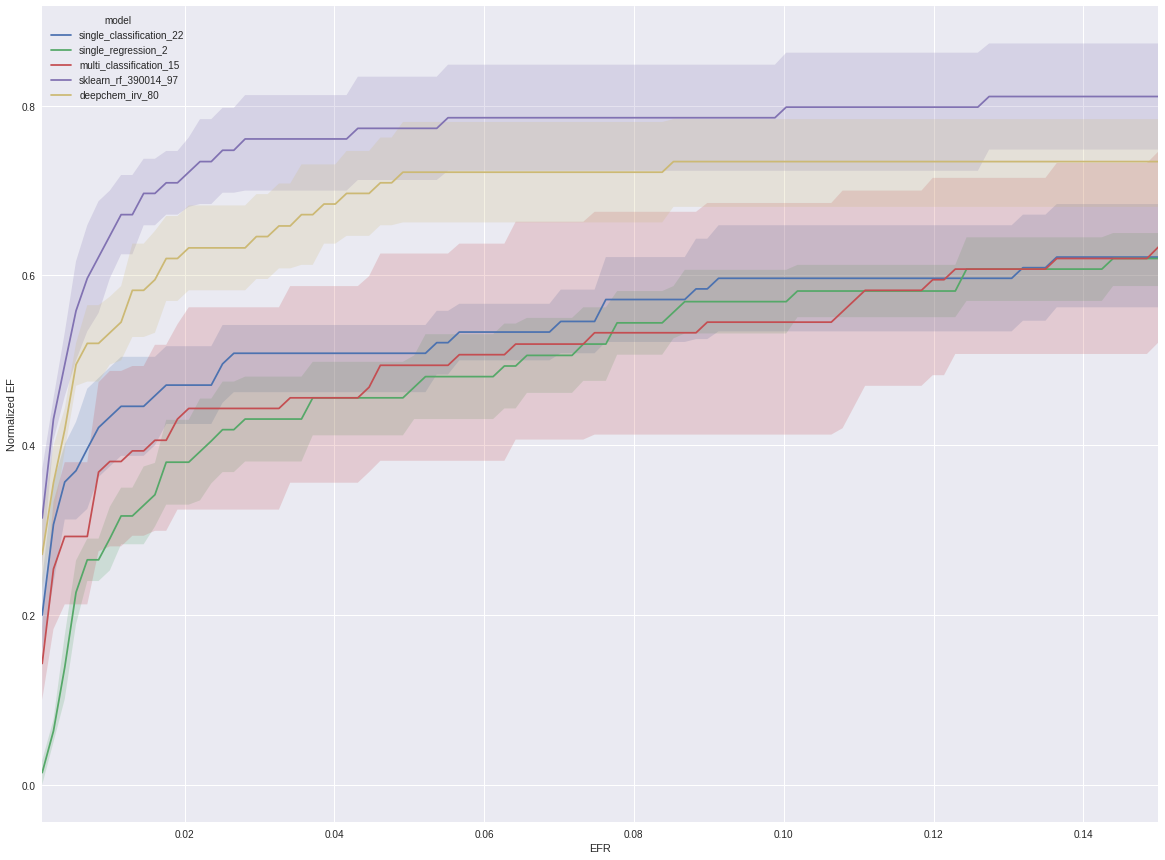

In [22]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 15.0)

# Calculate Normalized EF, and add it to dataframe
whole_pd['Normalized EF'] = whole_pd.apply(lambda row: row['EF'] / row['EF max'], axis=1)
sns.tsplot(data=whole_pd, time="EFR", unit="running process", condition="model", value="Normalized EF")

figure_dir = 'plottings/{}'.format(task_name)
if not os.path.isdir(figure_dir):
    os.makedirs(figure_dir)
plt.savefig('{}/NEF_curve.png'.format(figure_dir), bbox_inches = 'tight')

# Focused Normalized EF-Curve

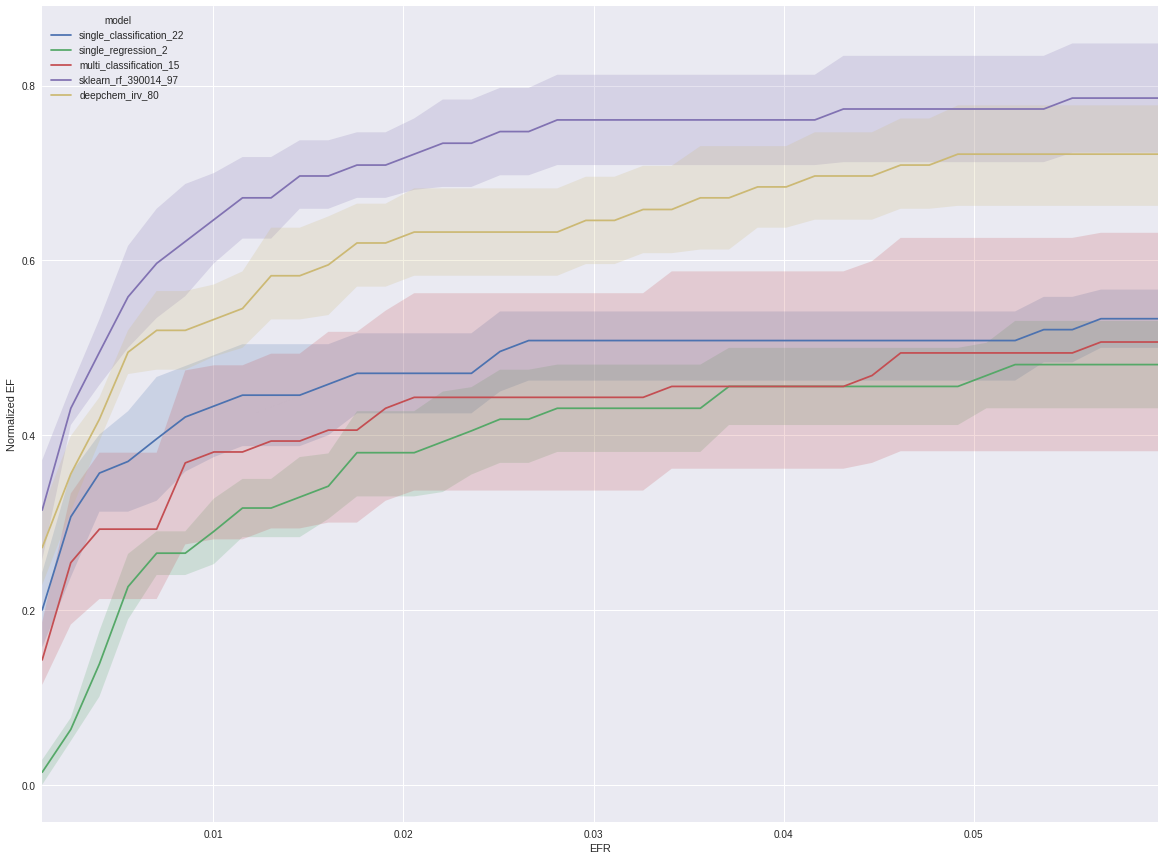

In [23]:
focused_pd = whole_pd[whole_pd['EFR']<=0.06]
sns.tsplot(data=focused_pd, time="EFR", unit="running process", condition="model", value="Normalized EF")
plt.show()